In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

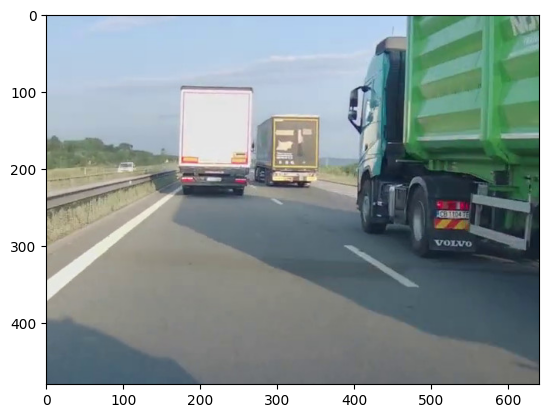

In [2]:
image = cv2.imread("./real_photos/photos_1/5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

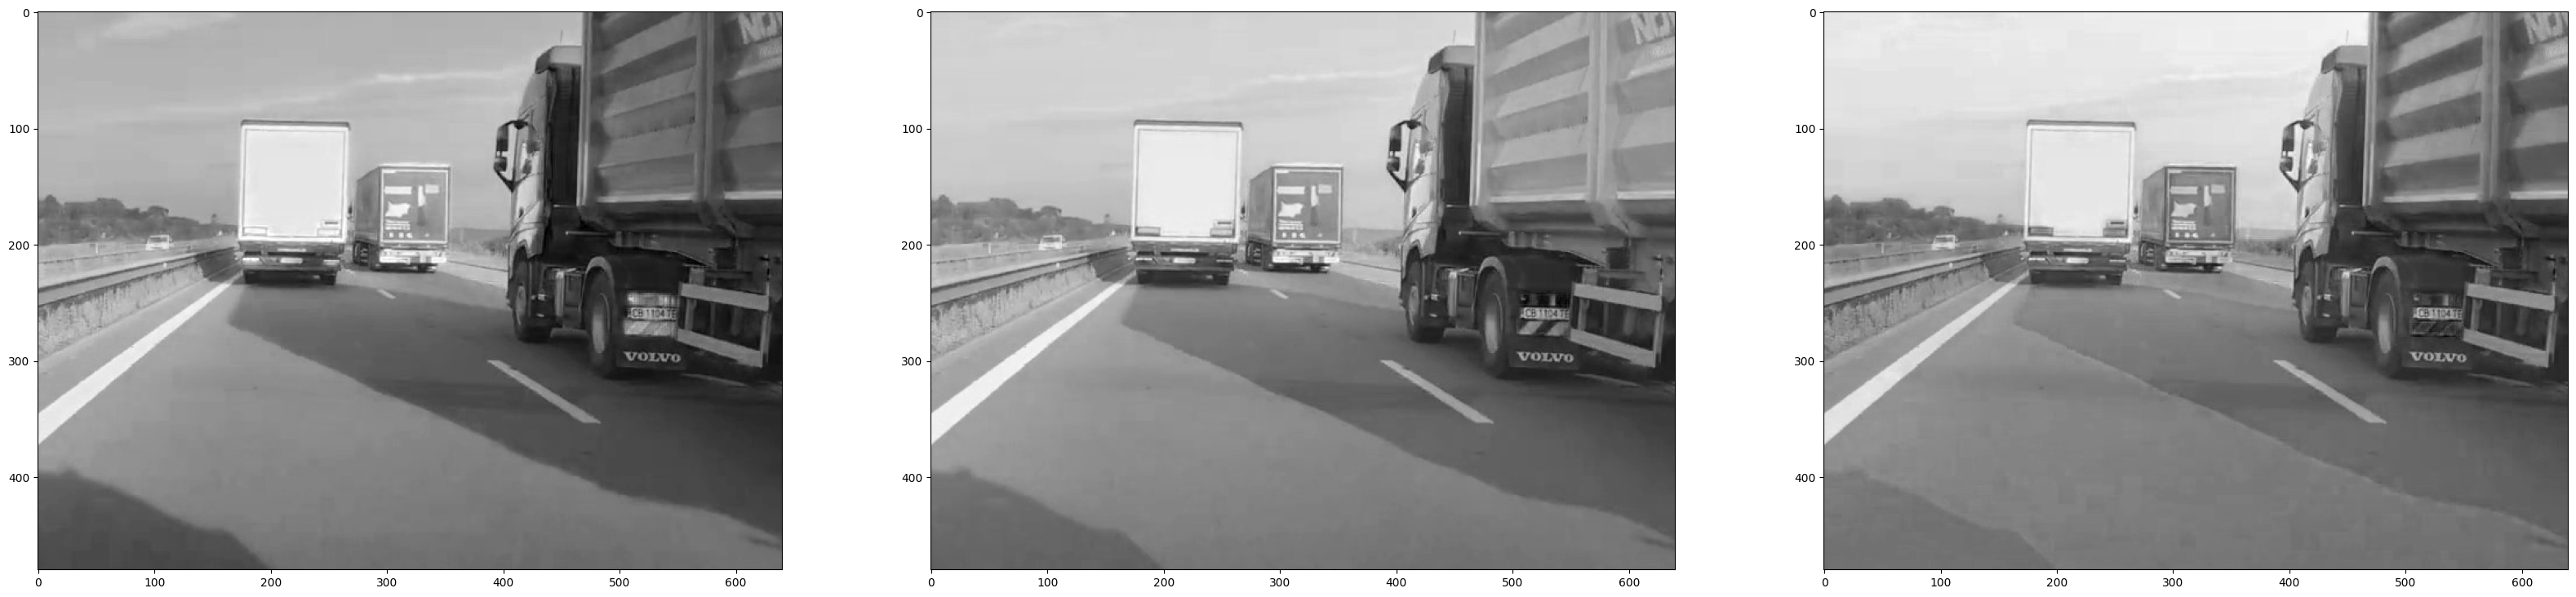

In [3]:
plt.figure(figsize=(40,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image[:, :, i], 'gray')

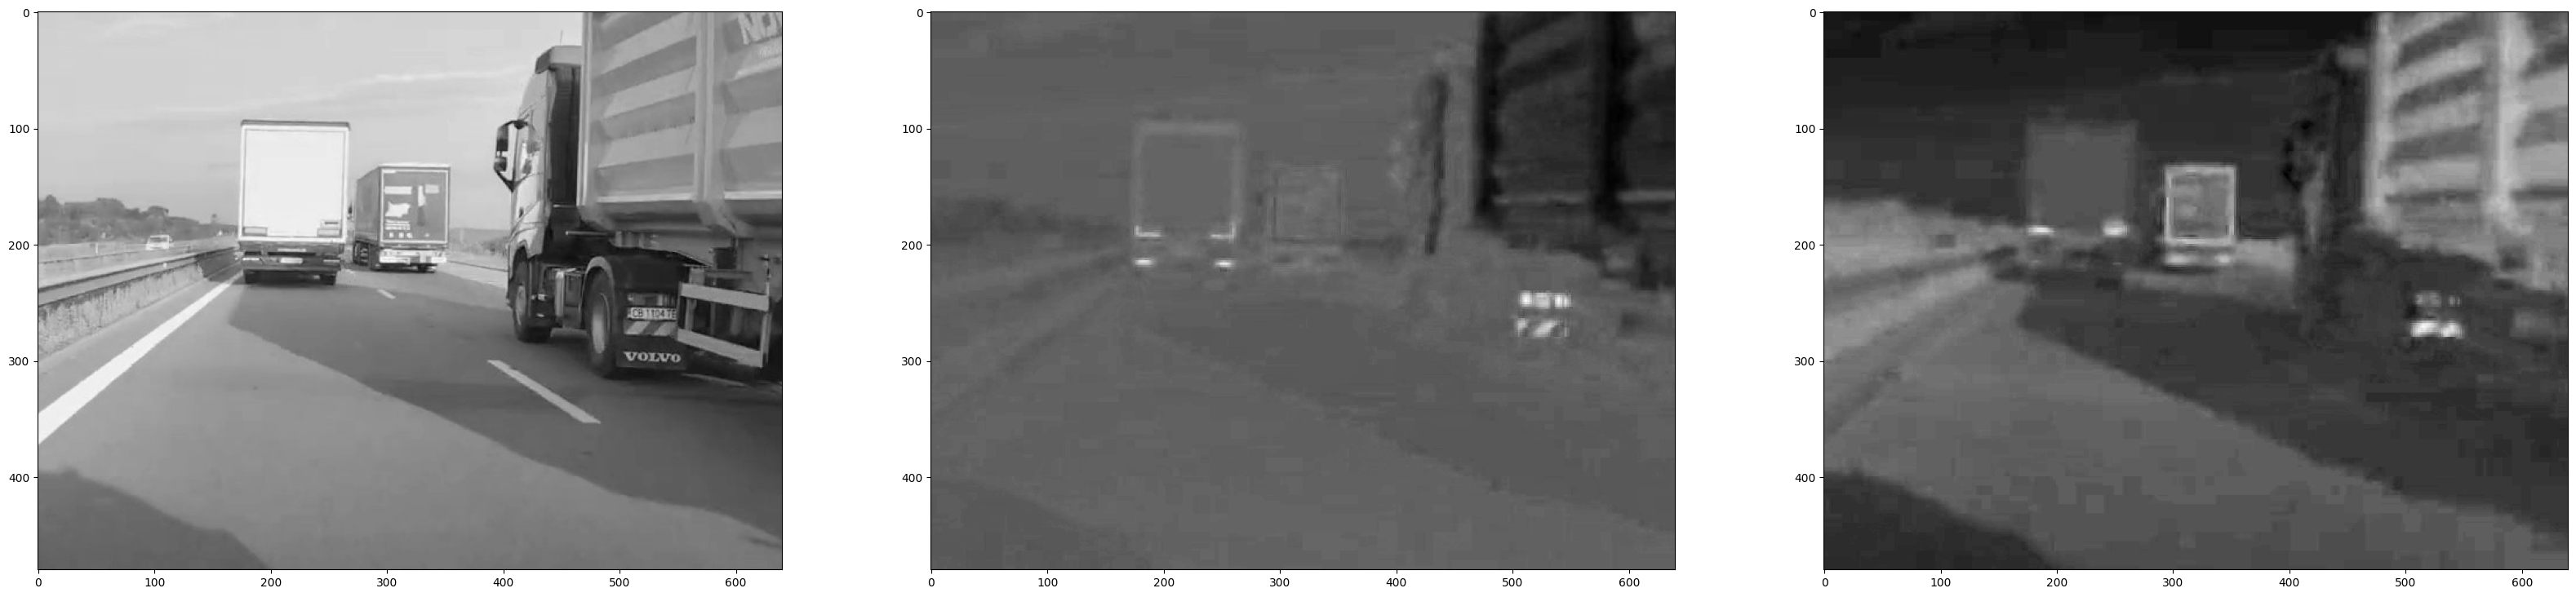

In [4]:
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
plt.figure(figsize=(40,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(lab[:, :, i], 'gray')

(480, 640)


True

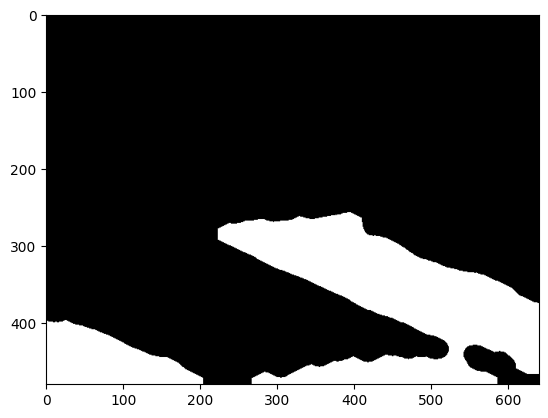

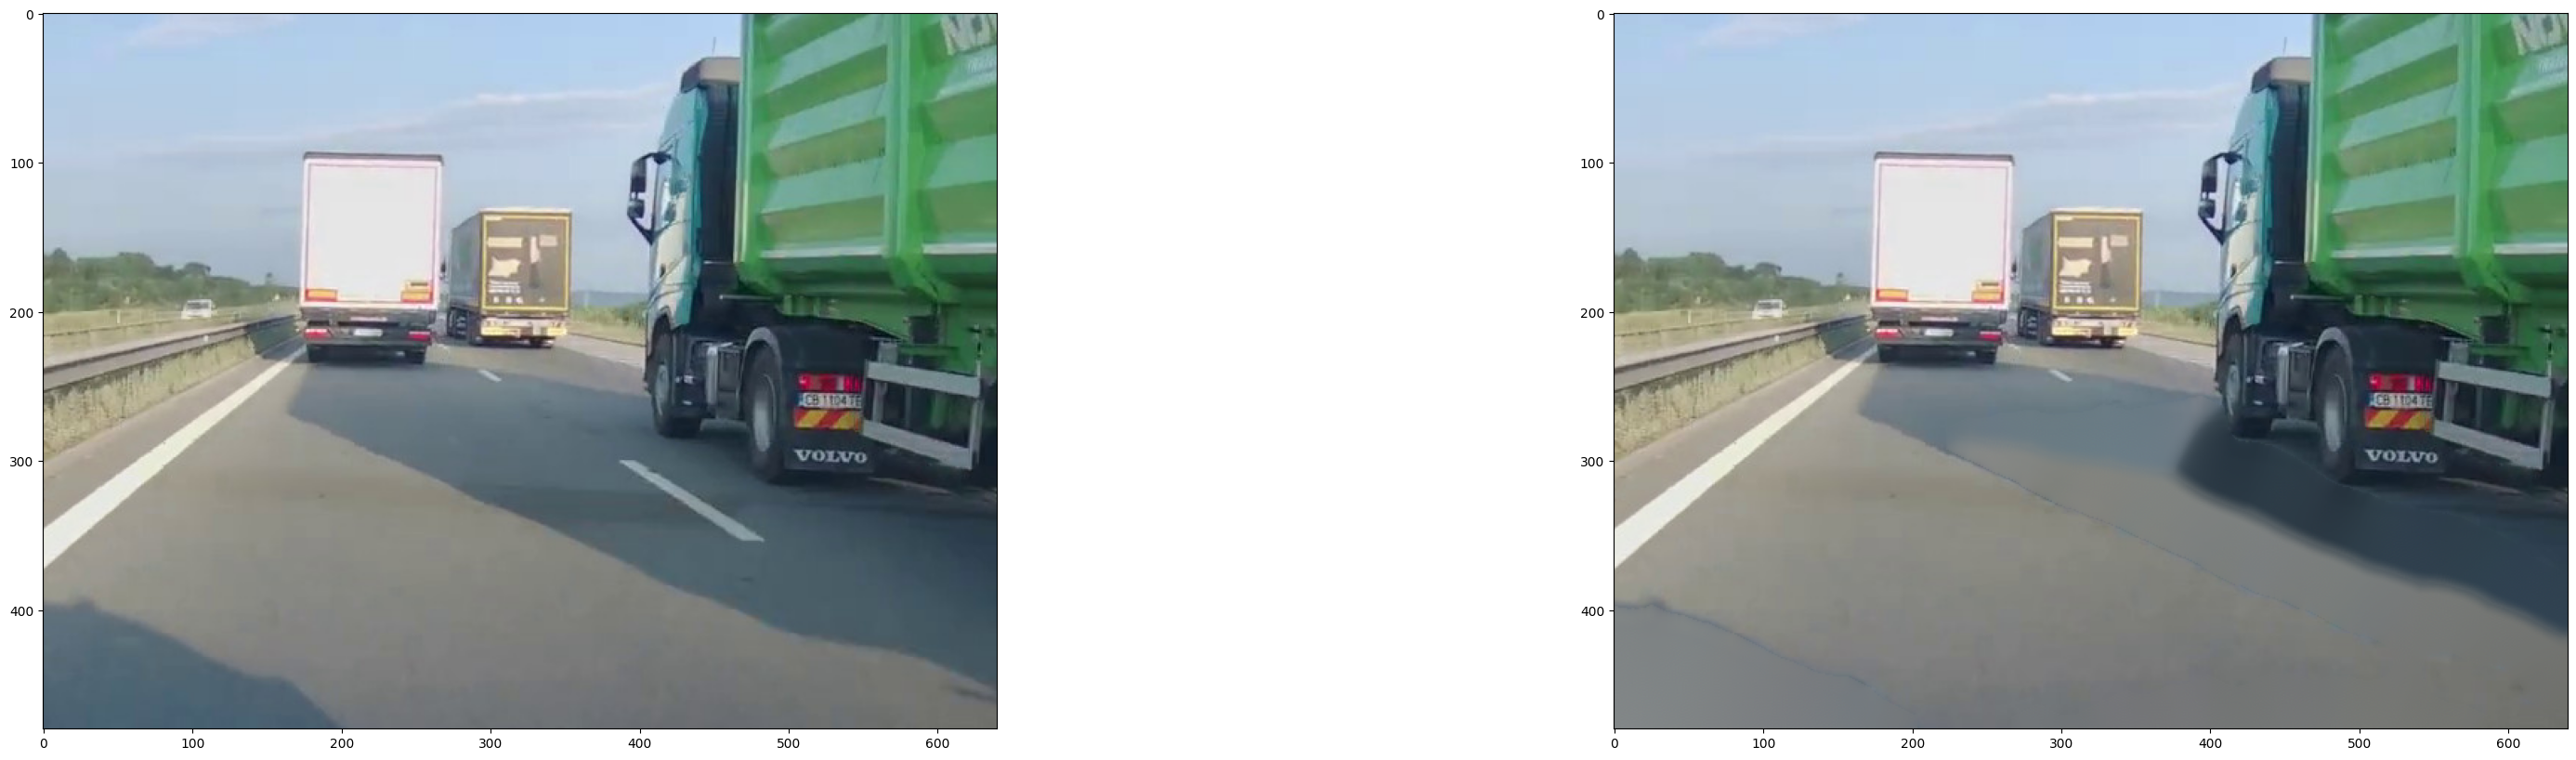

In [5]:
mask = cv2.inRange(lab, (70, 0, 70), (125, 255, 130))

print(mask.shape)

mask[0:240,:] = 0

plt.figure(1)


mask = cv2.erode(mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=7)
mask = cv2.dilate(mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=7)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(mask, 'gray')

masked = cv2.bitwise_and(image, image, mask=mask)

dst = image.copy()
# dst[mask.astype(np.bool_)] = (((dst[mask.astype(np.bool_)].astype(np.float32) / 255) ** 0.5) * 255).astype(np.uint8)
# mask = cv2.erode(mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations=1)
dst = cv2.inpaint(dst, mask, 15, cv2.INPAINT_TELEA)

plt.figure(2, figsize=(40,10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(dst)

cv2.imwrite("tmp_1.jpg", cv2.cvtColor(dst, cv2.COLOR_RGB2BGR))

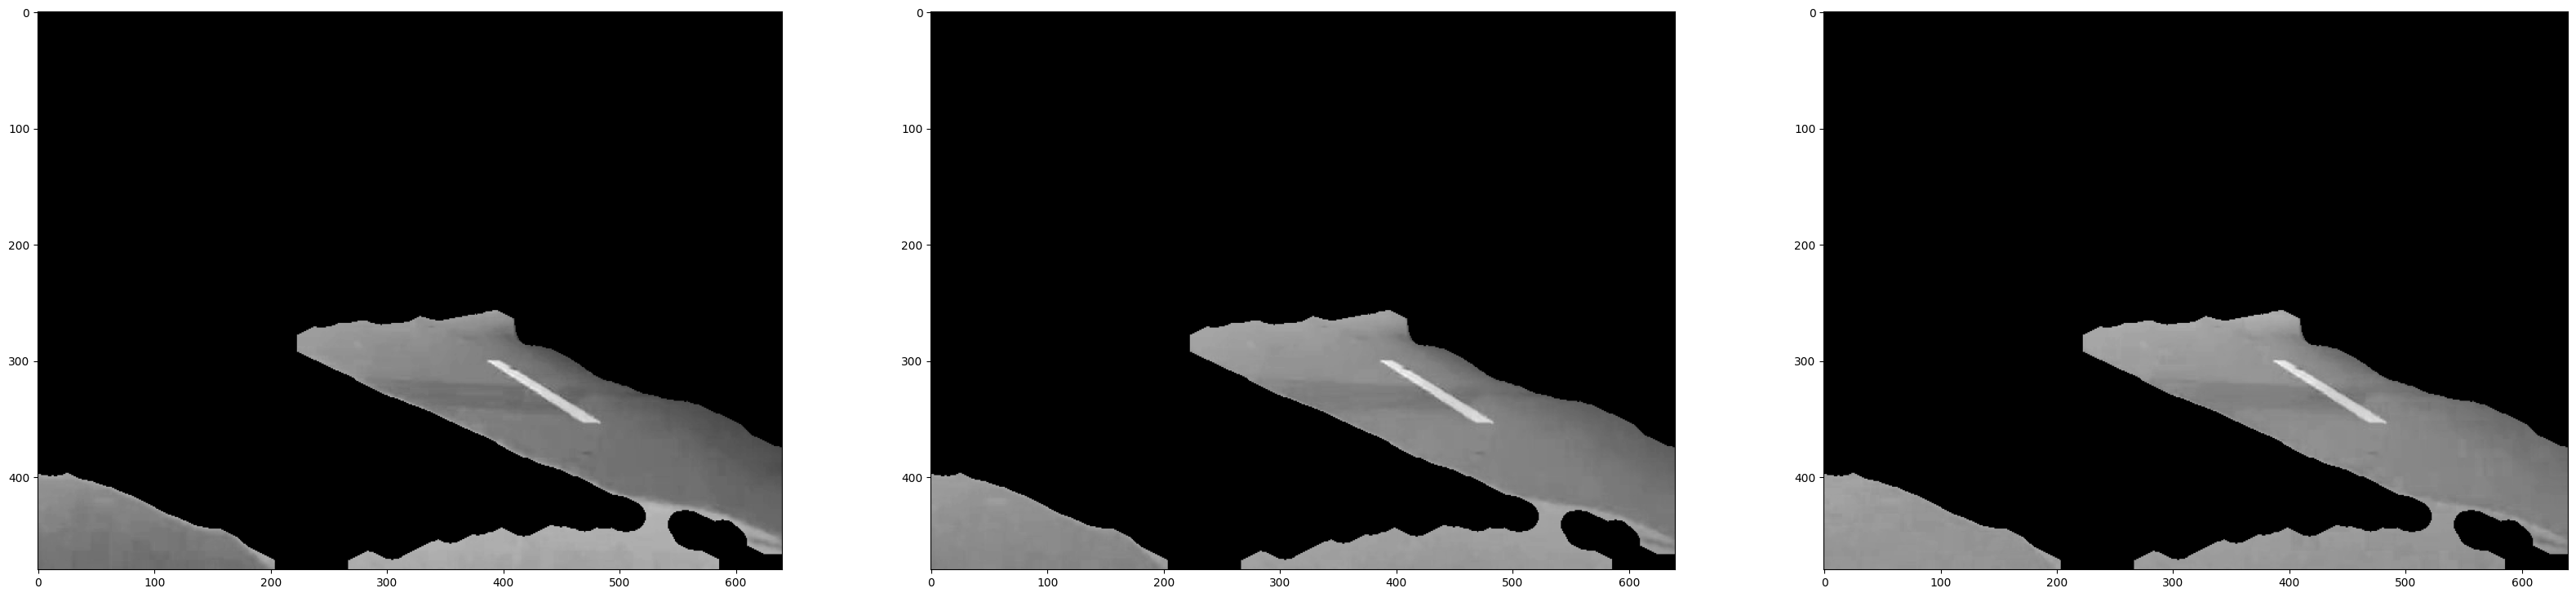

In [6]:
image2 = cv2.bitwise_and(image, image, mask=mask)
plt.figure(figsize=(40,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image2[:, :, i], 'gray')